<a href="https://colab.research.google.com/github/rhushiiii/f1_dnf/blob/main/race_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the datset directly from Kaggle

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("pranay13257/f1-dnf-classification")

print("Path to dataset files:", path)
f1_dnf_csv = path + "/f1_dnf.csv"

Using Colab cache for faster access to the 'f1-dnf-classification' dataset.
Path to dataset files: /kaggle/input/f1-dnf-classification


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv(f1_dnf_csv)

## Basic stats about the data

In [4]:
df.head()

,resultId,raceId,year,round,grid,positionOrder,points,laps,milliseconds,fastestLap,...,circuitRef,circuitId,name_y,location,country,lat,lng,alt,date,target_finish
0,2460,136,2002,13,11,4,3.0,77.0,NaN,\N,...,hungaroring,11,McLaren,Budapest,Hungary,47.5789,19.24860,264,2002-08-18,1
1,11565,483,1981,1,23,21,0.0,16.0,\N,\N,...,long_beach,43,McLaren,California,USA,33.7651,-118.18900,12,1981-03-15,0
2,18661,772,1958,8,0,26,0.0,0.0,\N,\N,...,nurburgring,20,Maserati,Nürburg,Germany,50.3356,6.94750,578,1958-08-03,0
3,25121,1058,2021,8,19,16,0.0,69.0,\N,57,...,red_bull_ring,70,Haas F1 Team,Spielberg,Austria,47.2197,14.76470,678,2021-06-27,0
4,8863,383,1988,12,0,30,0.0,0.0,\N,\N,...,monza,14,Euro Brun,Monza,Italy,45.6156,9.28111,162,1988-09-11,0


In [5]:
df.describe()

,resultId,raceId,year,round,grid,positionOrder,points,laps,circuitId,lat,lng,alt,target_finish
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9029.000000,9022.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,13440.56840,554.444500,1991.466600,8.540100,11.176200,12.681000,2.034460,46.759033,23.972500,34.013439,5.067721,281.465900,0.289500
std,7750.91677,314.184815,20.060237,5.085487,7.241008,7.635448,4.469553,29.840206,19.233599,25.167968,57.938131,414.586363,0.453553
min,9.00000,1.000000,1950.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-37.849700,-118.189000,-7.000000,0.000000
25%,6637.75000,300.000000,1977.000000,4.000000,5.000000,6.000000,0.000000,23.250000,9.000000,34.843100,-2.940560,18.000000,0.000000
50%,13428.50000,532.000000,1991.000000,8.000000,11.000000,12.000000,0.000000,53.000000,18.000000,43.734700,5.971390,153.000000,0.000000
75%,20159.25000,815.250000,2009.000000,12.000000,17.000000,18.000000,2.000000,67.000000,34.000000,49.254200,14.764700,401.000000,1.000000
max,26761.00000,1144.000000,2024.000000,24.000000,34.000000,39.000000,36.000000,200.000000,80.000000,57.265300,144.968000,2227.000000,1.000000


## Data Cleaning.

### Checking out the columns including \\N character.

In [6]:
(df == '\\N').sum()

,0
resultId,0
raceId,0
year,0
round,0
grid,0
positionOrder,0
points,0
laps,0
milliseconds,6375
fastestLap,6895


### Dropping the columns having more than 60% \\N values.

In [7]:
df=df.drop(['milliseconds','fastestLap','rank','fastestLapTime','fastestLapSpeed'],axis=1)

In [8]:
df.isnull().sum()

,0
resultId,0
raceId,0
year,0
round,0
grid,0
positionOrder,0
points,971
laps,978
driverRef,0
surname,0


### Imputing numerical cols.

In [9]:
cols_to_impute = ['points','laps']
df[cols_to_impute]=df[cols_to_impute].fillna(df[cols_to_impute].median())

In [10]:
df.isnull().sum()

,0
resultId,0
raceId,0
year,0
round,0
grid,0
positionOrder,0
points,0
laps,0
driverRef,0
surname,0


### Converting date and dob to datetime features to create a new feature age_at_race.

In [11]:
df['date']=pd.to_datetime(df['date'])

df['dob']=pd.to_datetime(df['dob'])
df['age_at_race'] = ((df['date'] - df['dob']).dt.days//365.25)

In [12]:
categorical_cols = df.select_dtypes('object','category').columns
numerical_cols = df.select_dtypes(np.number).columns

### Checking out and Capping outliers.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# @title
def create_subplot_grid(n_items, max_cols=4):
    n_cols = min(max_cols, n_items)
    n_rows = (n_items + n_cols - 1) // n_cols
    return n_rows, n_cols

def plot_boxplots_for_outliers(dataframe, cols, title_suffix=""):
    """Reusable function for boxplot visualization to detect outliers"""
    n_rows, n_cols = create_subplot_grid(len(cols), 4)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 3))
    axes = axes.flatten()

    colors = sns.color_palette("coolwarm", len(cols))

    for i, col in enumerate(cols):
        ax = axes[i]

        # Create styled boxplot
        bp = ax.boxplot(dataframe[col].dropna(), patch_artist=True,
                       boxprops=dict(facecolor=colors[i], alpha=0.7),
                       medianprops=dict(color='black', linewidth=2),
                       flierprops=dict(marker='o', markerfacecolor='red', alpha=0.6, markersize=4))

        # Calculate outlier statistics
        Q1 = dataframe[col].quantile(0.25)
        Q3 = dataframe[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_count = ((dataframe[col] < lower_bound) | (dataframe[col] > upper_bound)).sum()

        # Add outlier count annotation
        ax.text(0.02, 0.98, f'Outliers: {outliers_count}',
                transform=ax.transAxes, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7),
                fontsize=9)

        ax.set_title(f'{col}{title_suffix}', fontsize=11, pad=10)
        ax.set_ylabel('Value', fontsize=10)
        ax.grid(True, alpha=0.3)

    # Remove extra subplots
    for j in range(len(cols), len(axes)):
        fig.delaxes(axes[j])

    return fig, axes

def cap_outliers_iqr(dataframe, columns, multiplier=1.5):
    """
    Winsorize (clip) outliers using the IQR method.

    Parameters:
    - dataframe: Input DataFrame
    - columns: List/Index of numeric columns to process
    - multiplier: IQR multiplier for outlier bounds (default 1.5)

    For each column:
    1. Compute Q1, Q3, IQR
    2. Compute lower = Q1 - multiplier*IQR; upper = Q3 + multiplier*IQR
    3. Count outliers before
    4. Clip values to [lower, upper]
    5. Count remaining outliers (should be zero or near-zero due to numeric precision)
    """
    df_capped = dataframe.copy()
    outlier_stats = {}

    for col in columns:
        if col in df_capped.columns:
            Q1 = df_capped[col].quantile(0.25)
            Q3 = df_capped[col].quantile(0.75)
            IQR = Q3 - Q1

            lower_bound = Q1 - multiplier * IQR
            upper_bound = Q3 + multiplier * IQR

            outliers_before = ((df_capped[col] < lower_bound) | (df_capped[col] > upper_bound)).sum()

            df_capped[col] = df_capped[col].clip(lower_bound, upper_bound)

            outliers_after = ((df_capped[col] < lower_bound) | (df_capped[col] > upper_bound)).sum()

            outlier_stats[col] = {
                'outliers_before': int(outliers_before),
                'outliers_after': int(outliers_after),
                'lower_bound': float(lower_bound),
                'upper_bound': float(upper_bound),
                'Q1': float(Q1),
                'Q3': float(Q3),
                'IQR': float(IQR)
            }

    return df_capped, outlier_stats

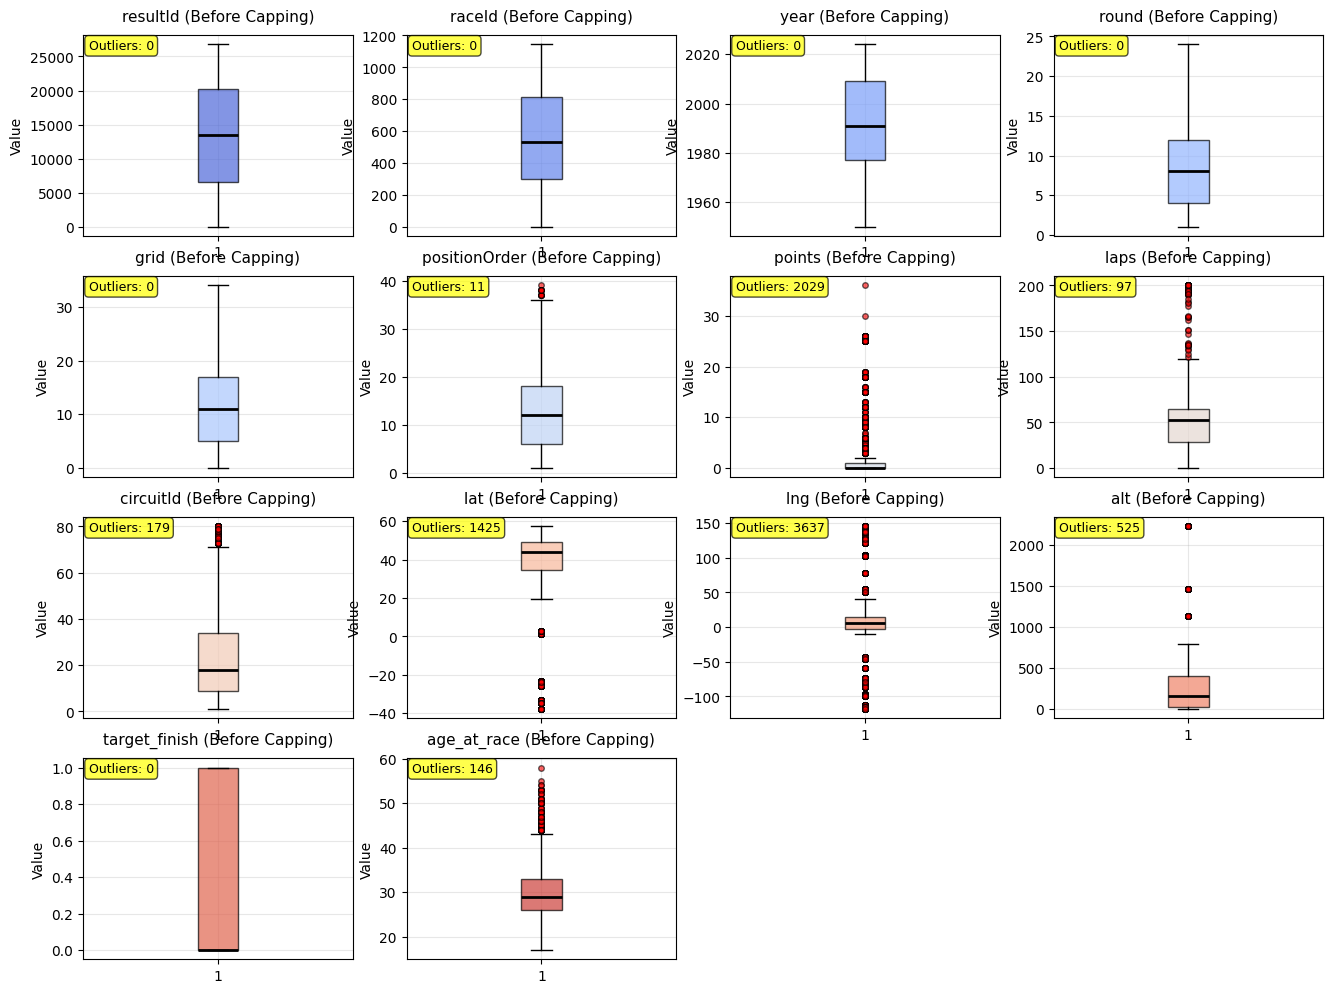

In [15]:
plot_boxplots_for_outliers(df, df[numerical_cols].columns, title_suffix=" (Before Capping)")
plt.show()

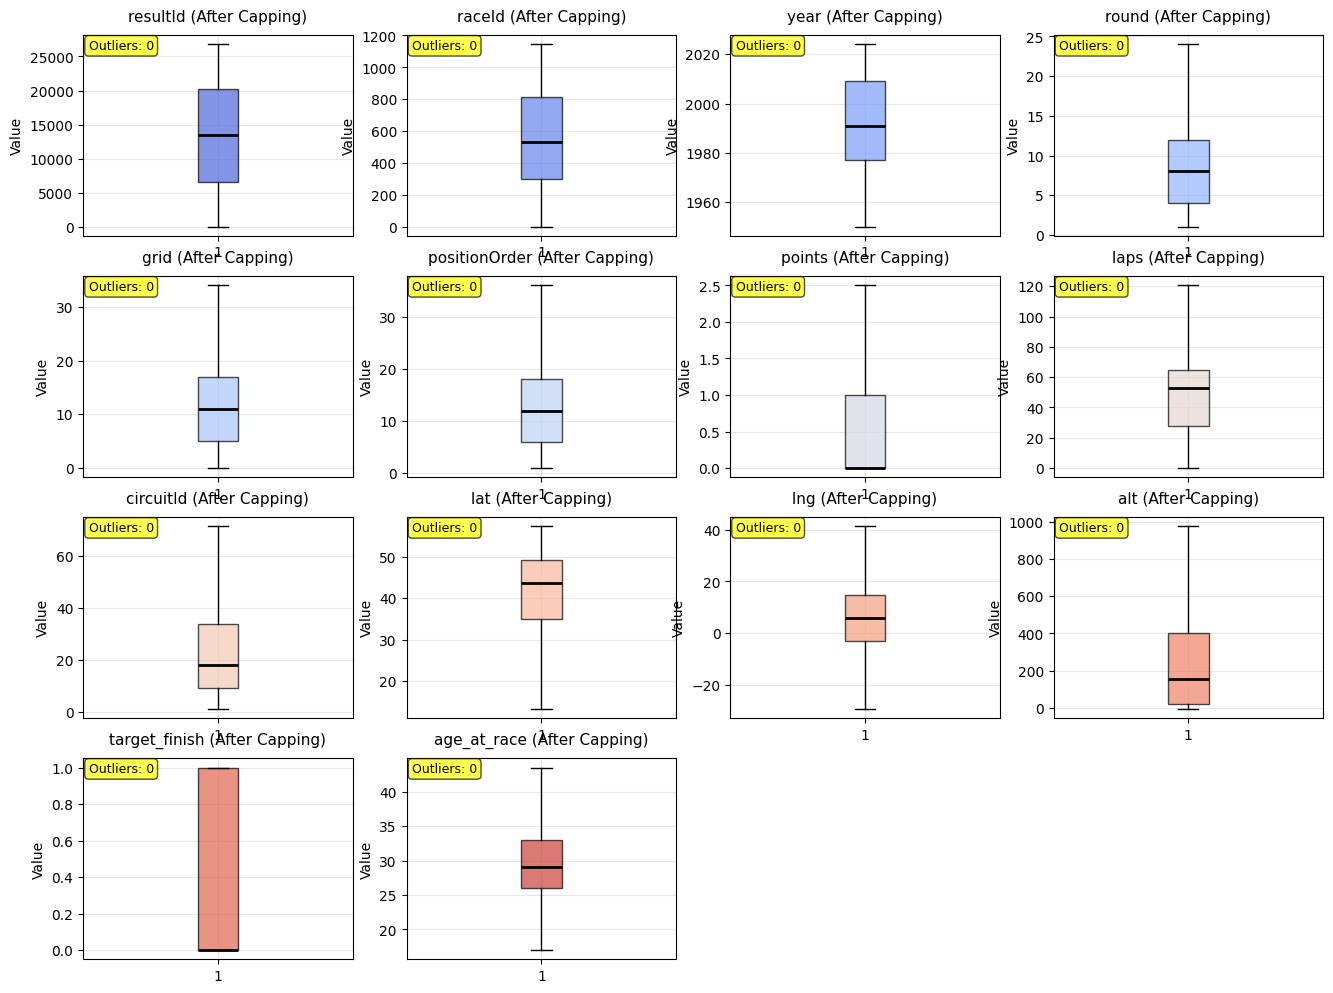

In [16]:
df_capped , x= cap_outliers_iqr(df, df.select_dtypes(include=np.number).columns)
plot_boxplots_for_outliers(df_capped, df_capped.select_dtypes(include=np.number).columns, title_suffix=" (After Capping)")
plt.show()

In [17]:
df = df.drop(['surname','forename','dob','nationality_x','name','nationality_y','name_y','date'],axis=1)

## Univariate Analysis.

### 1. Numerical Feature analysis :
Plotting distplots for the seeing the distribution of individual numerical features.

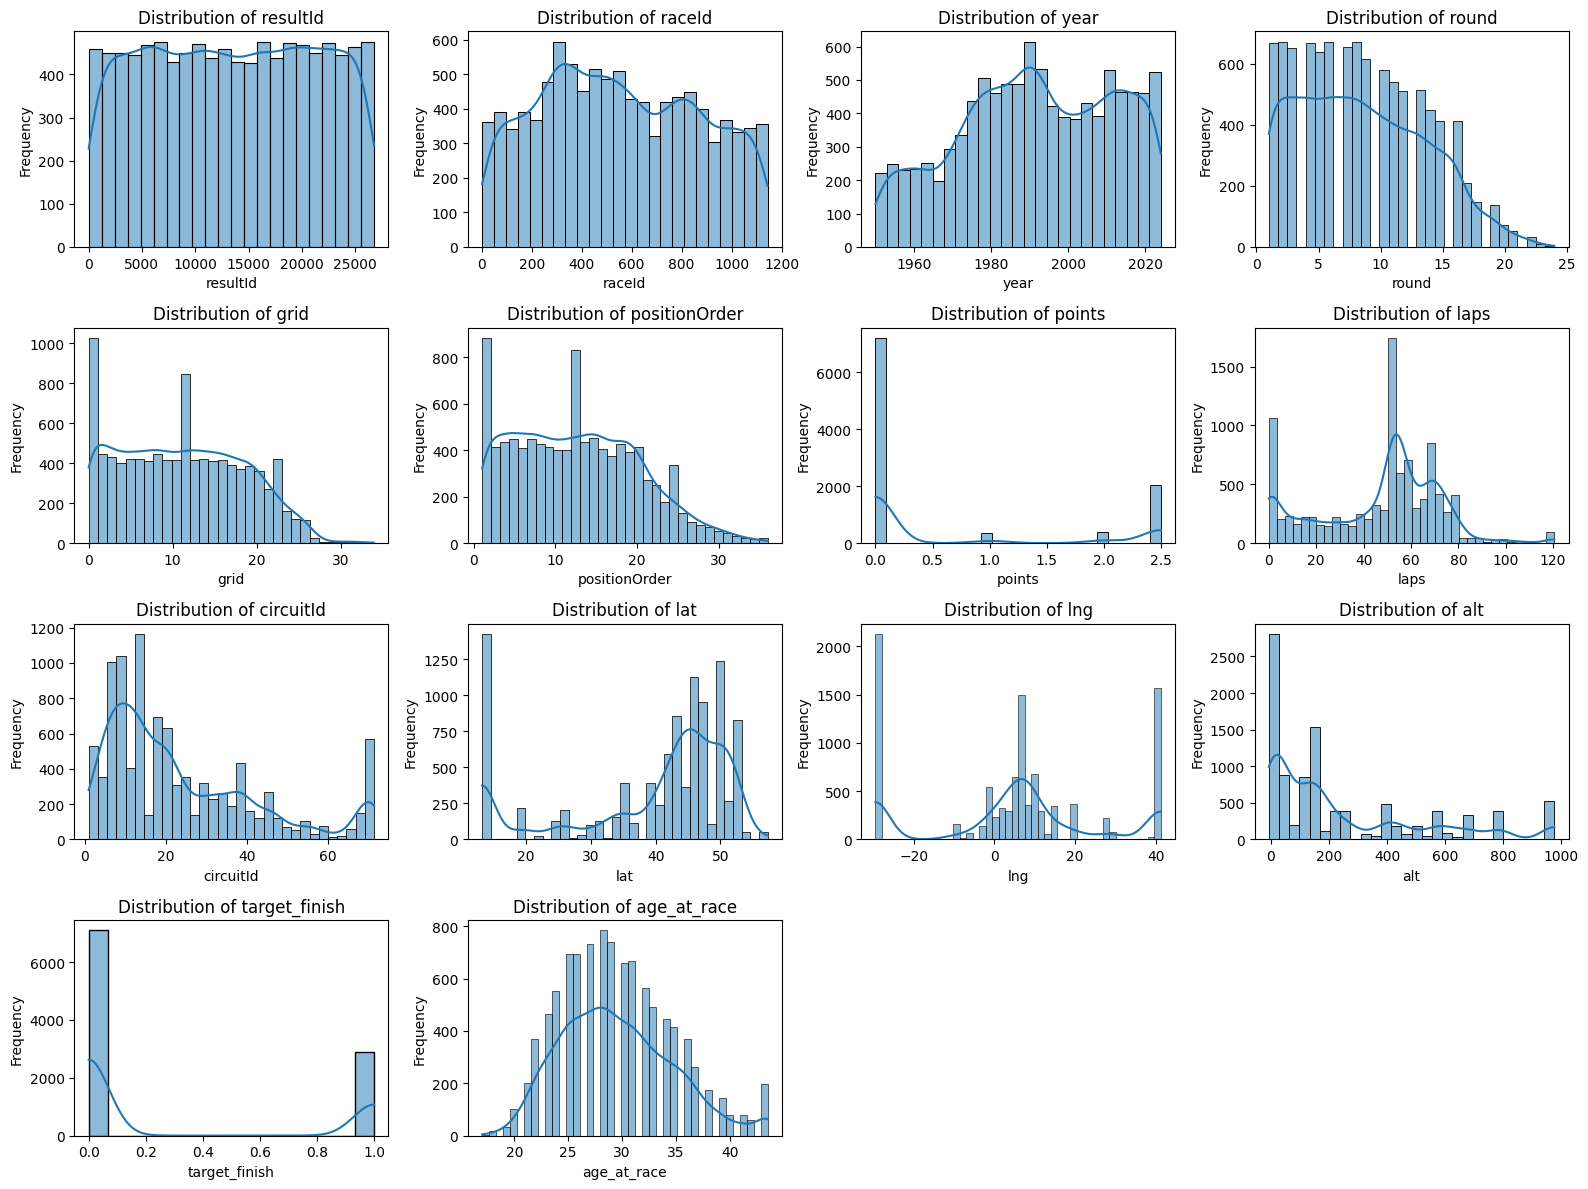

In [18]:
# Visualize the distribution of numerical features
n_rows, n_cols = create_subplot_grid(len(numerical_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 3))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    if col in df_capped.columns:
        sns.histplot(df_capped[col], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
    else:
        # Handle cases where a column might not be in the capped DataFrame
        fig.delaxes(axes[i]) # Remove the unused subplot

# Remove any remaining empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### 2. Categorical Feature analysis :
Plotting count plots for top 10 unique categories only.

/tmp/ipython-input-2580386427.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipython-input-2580386427.py:29: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(
/tmp/ipython-input-2580386427.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipython-input-2580386427.py:29: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(
/tmp/ipython-input-2580386427.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` varia

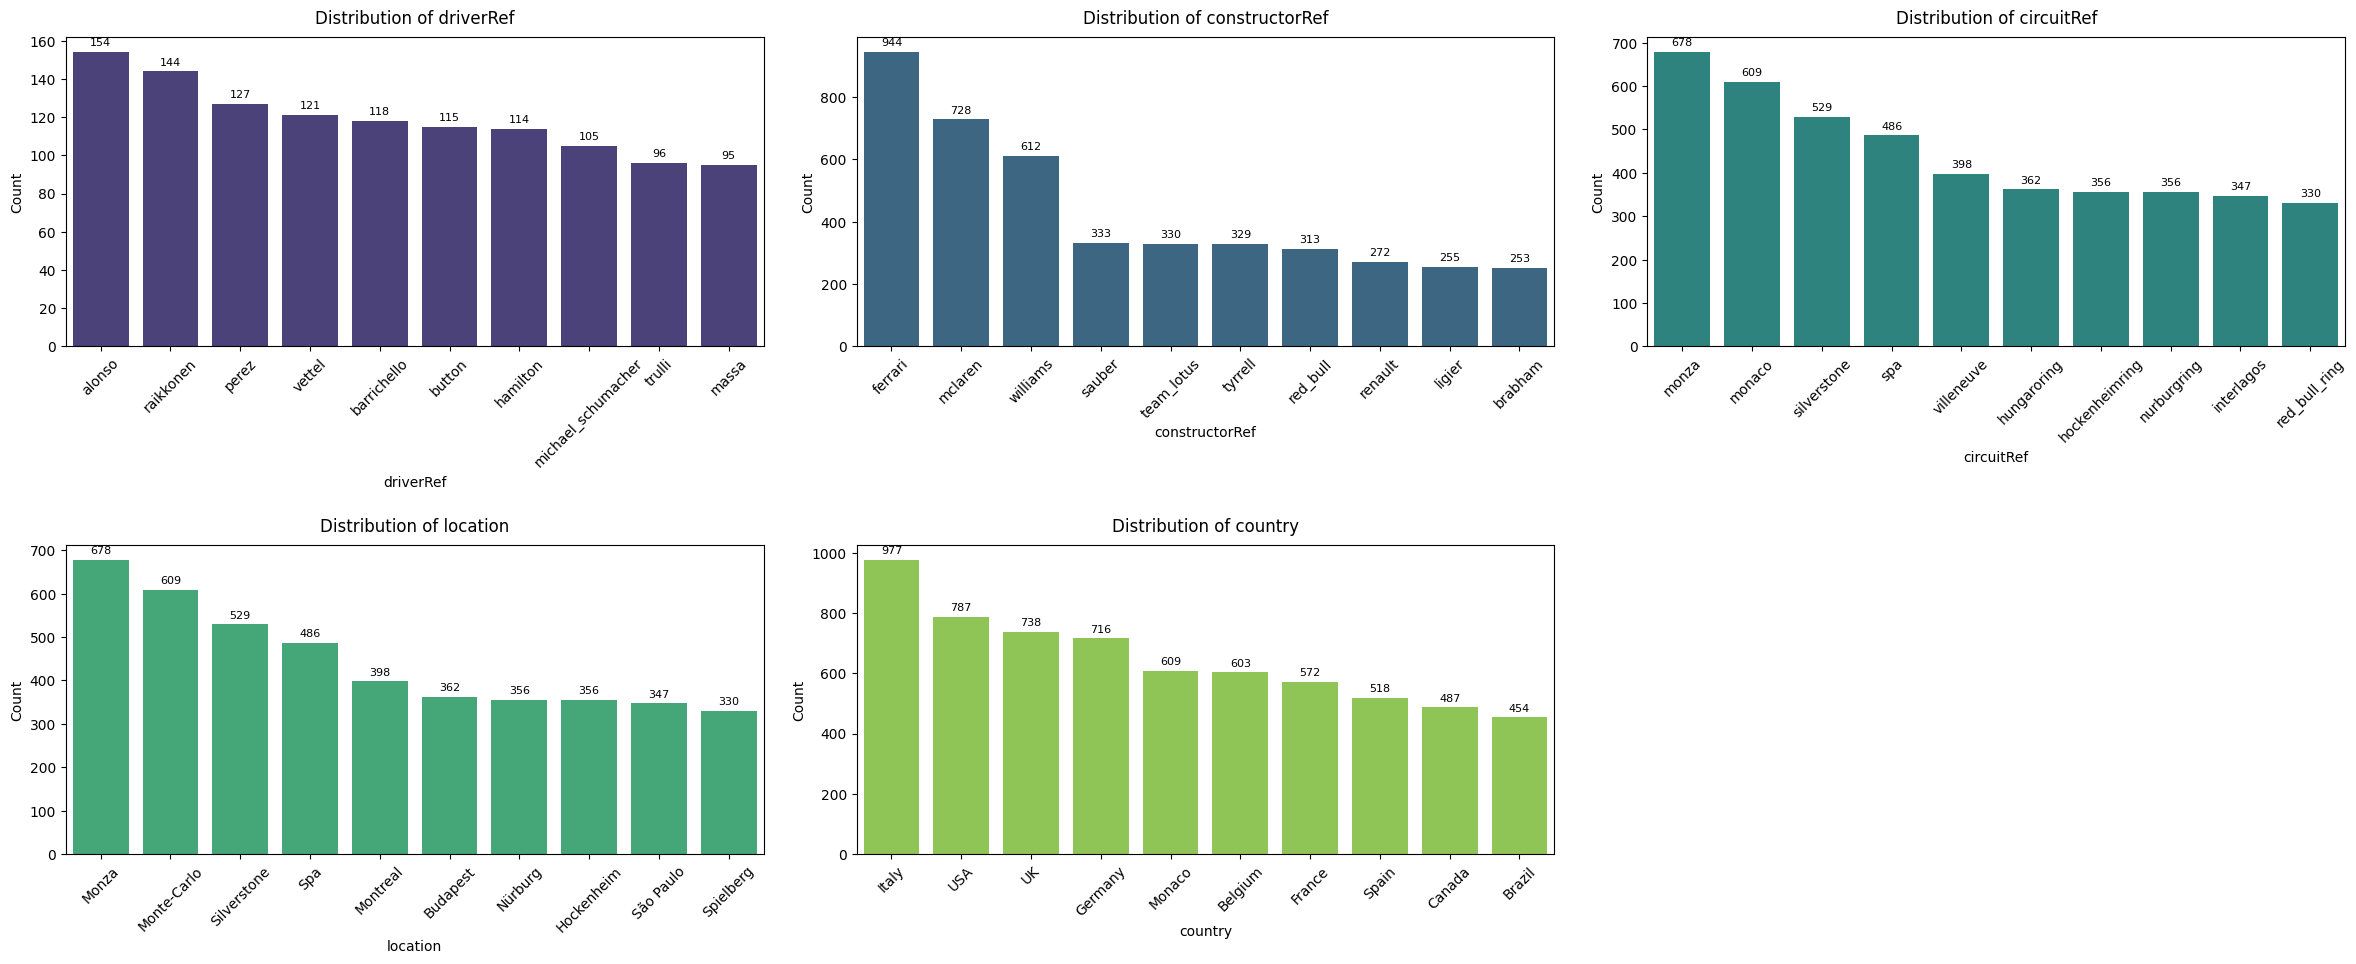

In [19]:
categorical_cols_present = df.select_dtypes('object').columns

# Helper to compute grid shape
def create_subplot_grid(n_items, max_cols=3):
    n_cols = min(max_cols, n_items)
    n_rows = (n_items + n_cols - 1) // n_cols
    return n_rows, n_cols

# Create subplots dynamically
n_rows, n_cols = create_subplot_grid(len(categorical_cols_present))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(8 * n_cols, 5 * n_rows))
axes = axes.flatten()

# Use a single color palette for consistency
palette = sns.color_palette("viridis", len(categorical_cols_present))

# Loop through each categorical column
for i, col in enumerate(categorical_cols_present):
    ax = axes[i]

    # Sort categories by descending frequency
    order = df[col].value_counts().index

    # Limit to top categories (avoid overcrowding if too many)
    if len(order) > 15:
        order = order[:10]  # show only top 15 categories

    # Plot
    sns.countplot(
        data=df,
        x=col,
        order=order,
        palette=[palette[i % len(palette)]],
        ax=ax
    )

    # Title and labels
    ax.set_title(f'Distribution of {col}', fontsize=12, pad=10)
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel('Count', fontsize=10)

    # Rotate labels for readability
    ax.tick_params(axis='x', rotation=45)

    # Annotate counts on bars
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    fontsize=8, color='black', xytext=(0, 3),
                    textcoords='offset points')

# Remove any extra empty axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=2)
plt.show()

## Bivariate Analysis.

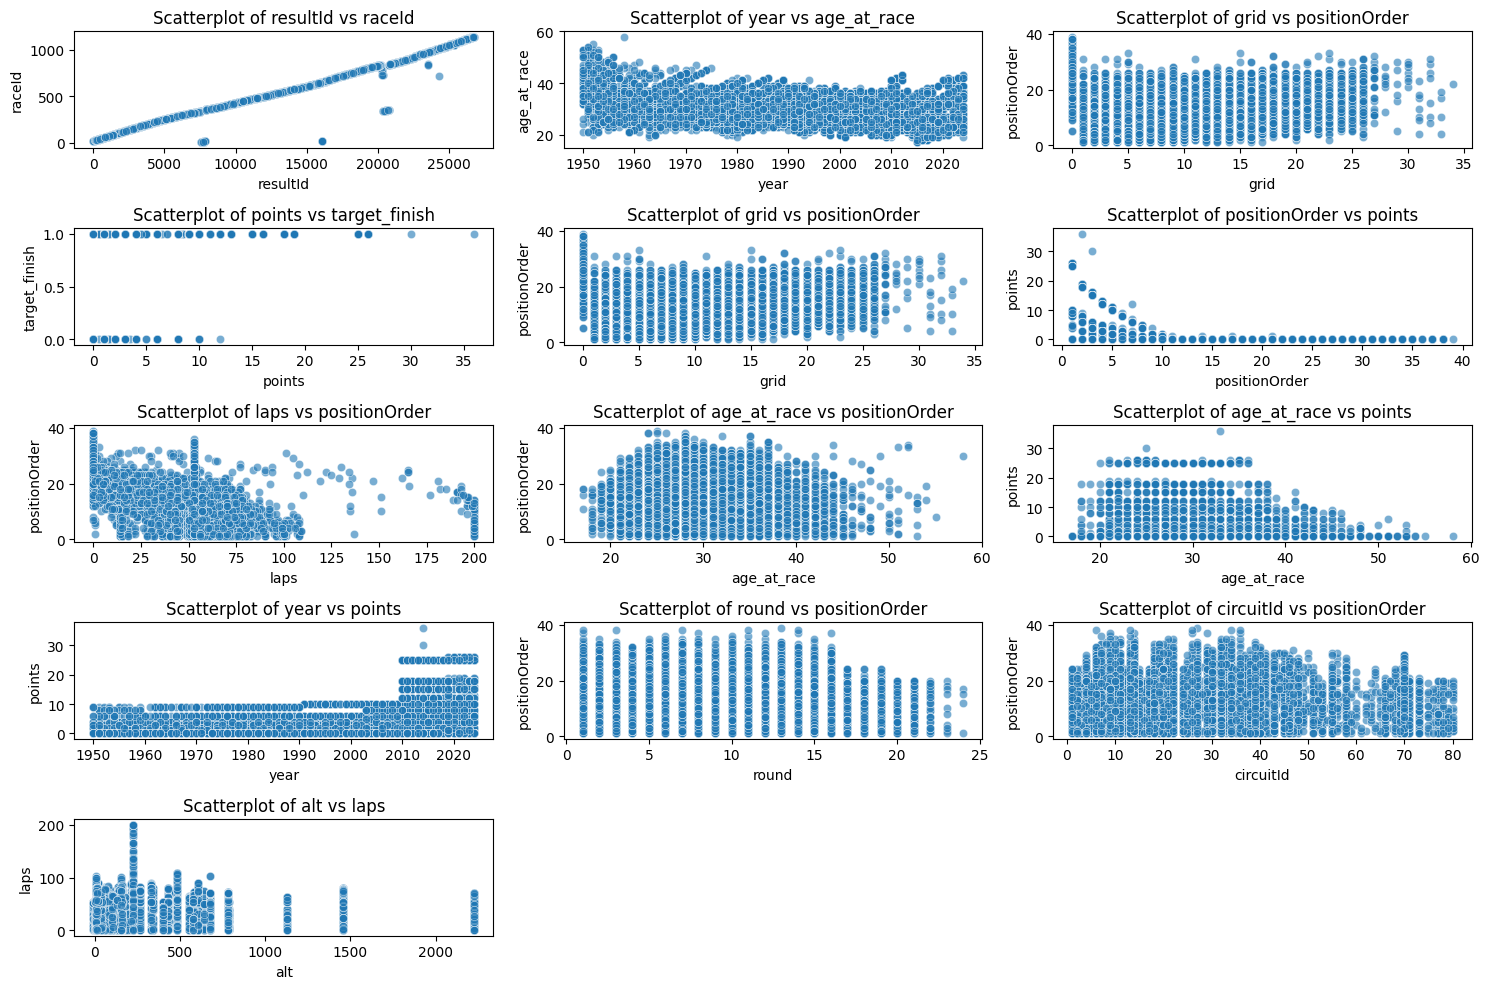

In [20]:
# Select a few pairs of numerical columns for scatterplots based on correlation matrix
# Example pairs with relatively higher correlations (from the previous heatmap)
pairs_to_plot = [
    ('resultId', 'raceId'),
    ('year', 'age_at_race'),
    ('grid', 'positionOrder'),
    ('points', 'target_finish'),
    ('grid', 'positionOrder'),
    ('positionOrder', 'points'),
    ('laps', 'positionOrder'),
    ('age_at_race', 'positionOrder'),
    ('age_at_race', 'points'),
    ('year', 'points'),
    ('round', 'positionOrder'),
    ( 'circuitId', 'positionOrder'),
    ('alt', 'laps')
]

# Generate scatterplots for the selected pairs
plt.figure(figsize=(15, 10))

for i, (col1, col2) in enumerate(pairs_to_plot):
    plt.subplot(5, 3, i + 1) # Create a 2x2 grid of subplots
    sns.scatterplot(data=df, x=col1, y=col2, alpha=0.6)
    plt.title(f'Scatterplot of {col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)

plt.tight_layout()
plt.show()

## Training the model.

In [21]:
X = df[numerical_cols].drop(['target_finish'],axis=1)
y = df['target_finish']

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## 1. RandomForestClassifier

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,r2_score,roc_auc_score,auc

# Base model
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print("ROC and AUC :",roc_auc_score(y_test,y_pred))
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

ROC and AUC : 0.923176442515622

Test Accuracy: 0.9415

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96      1442
           1       0.91      0.88      0.89       558

    accuracy                           0.94      2000
   macro avg       0.93      0.92      0.93      2000
weighted avg       0.94      0.94      0.94      2000


Confusion Matrix:
 [[1391   51]
 [  66  492]]


## 2. XGBClassifier

In [24]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,r2_score,roc_auc_score



xgb_clf = xgb.XGBClassifier(
    n_estimators=100,   # number of trees
    max_depth=6,        # maximum tree depth
    learning_rate=0.2,  # step size shrinkage
    subsample=0.8,      # fraction of samples per tree
    colsample_bytree=0.8, # fraction of features per tree
    random_state=42,
    eval_metric='mlogloss'  # for multi-class classification
)

xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)
print("ROC and AUC :",roc_auc_score(y_test,y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


ROC and AUC : 0.9491310356484174
Accuracy: 0.9615

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      1442
           1       0.94      0.92      0.93       558

    accuracy                           0.96      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.96      0.96      0.96      2000


Confusion Matrix:
 [[1409   33]
 [  44  514]]


In [26]:
import pickle

filename = 'race_prediction.pkl'
pickle.dump(xgb_clf, open(filename, 'wb'))

print(f"Model saved to {filename}")

Model saved to race_prediction.pkl


# Task
Create a Streamlit application in `app.py` to deploy the machine learning model `xgb_model.pkl`. The application should load the model, provide a user interface for inputting features, make predictions based on the input, and display the prediction result.

In [38]:
%%writefile /content/app.py
import streamlit as st
import pickle
import pandas as pd
import numpy as np

st.title('F1 Race Finish Prediction')
st.markdown("""
This application predicts whether a Formula 1 car will finish a race based on various historical data points.
Input the features below and click "Predict" to see the result.
""")

# Load the model
filename = 'race_prediction.pkl'
try:
    with open(filename, 'rb') as f:
        loaded_model = pickle.load(f)
    st.success(f"Model '{filename}' loaded successfully.")
except FileNotFoundError:
    st.error(f"Error: Model file '{filename}' not found. Please make sure the file exists in the correct directory.")
    loaded_model = None # Set loaded_model to None if file not found
except Exception as e:
    st.error(f"An error occurred while loading the model: {e}")
    loaded_model = None

# Define input fields based on model features. These should match the features used during training.
# Based on the X_train variable, the features are:
feature_names = [
    'resultId', 'raceId', 'year', 'round', 'grid', 'positionOrder', 'points',
    'laps', 'circuitId', 'lat', 'lng', 'alt', 'age_at_race'
]

st.subheader('Input Features')

# Create input fields for each feature
input_data = {}
for feature in feature_names:
    # Determine appropriate default values and step based on feature type/range
    # These are rough estimates based on the describe() output and domain knowledge
    if feature in ['resultId', 'raceId', 'year', 'round', 'circuitId', 'grid', 'positionOrder']:
        # Using number_input with integer format for features that are likely integers
        input_data[feature] = st.number_input(f'{feature.replace("_", " ").title()}', value=0, step=1, format='%d')
    elif feature in ['points', 'laps', 'age_at_race']:
         # Using number_input with float format for features that can be floats
         input_data[feature] = st.number_input(f'{feature.replace("_", " ").title()}', value=0.0, step=1.0, format='%f')
    elif feature in ['lat', 'lng', 'alt']:
        # More specific ranges or defaults might be needed for geographical data, but using float format as a general approach
         input_data[feature] = st.number_input(f'{feature.replace("_", " ").title()}', value=0.0, format='%f')
    else:
        # Default for any other numerical features
        input_data[feature] = st.number_input(f'{feature.replace("_", " ").title()}', value=0.0, format='%f')


# Add a predict button
predict_button = st.button('Predict Finish')

# Implement prediction logic
if predict_button and loaded_model is not None:
    try:
        # Convert input data to a DataFrame
        input_df = pd.DataFrame([input_data])

        # Ensure the column order matches the training data if necessary.
        # For safety, reorder columns based on the feature_names list.
        input_df = input_df[feature_names]

        # Make prediction
        prediction = loaded_model.predict(input_df)

        # Obtain the prediction probabilities for the positive class (finishing the race)
        # Assuming target_finish = 1 means finishing
        prediction_proba = loaded_model.predict_proba(input_df)[:, 1]

        # Display the result
        st.subheader('Prediction Result')
        if prediction[0] == 1:
            st.success(f'Prediction: The car is likely to finish the race (Probability: {prediction_proba[0]:.2f})')
        else:
            st.error(f'Prediction: The car is likely not to finish the race (Probability: {prediction_proba[0]:.2f})')

    except Exception as e:
        st.error(f"An error occurred during prediction: {e}")

Overwriting /content/app.py


In [42]:
!streamlit run app.py & npx localtunnel --port 8501



⠙⠹⠸⠼⠴
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.229.222.141:8501

⠦⠧⠇⠏⠋⠙⠹your url is: https://ripe-oranges-rest.loca.lt
  Stopping...
^C


In [40]:
!bypass-tunnel-reminder

/bin/bash: line 1: bypass-tunnel-reminder: command not found
